# convolution testy

In [2]:
import gluoncv as gcv
import mxnet as mx
# mxnet NDarray 
from mxnet import nd

# MXNet Gluon Neural network layers.
from mxnet.gluon import nn

# optional for displaying the image
import ipyplot
import matplotlib.pyplot as plt
import numpy as np

# Loading images via python

In [3]:
# load an image using numpy and display it.
image_filepath = 'imgs/stimpyG.png'
img_filename_array = np.array([image_filepath])
ipyplot.plot_images(img_filename_array)

Show the file using markdown
```
Markdown method with scaling parameter.
<img src="some_file.some_ext" width="400">
```
<img src="imgs/stimpyG.png" width="200">

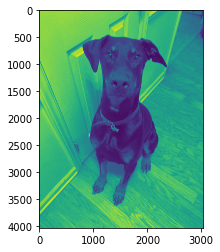

In [4]:
# imshow and imread method
# no idea why its got a green hue at this moment?
o = plt.imshow(plt.imread('imgs/stimpyG.png'))

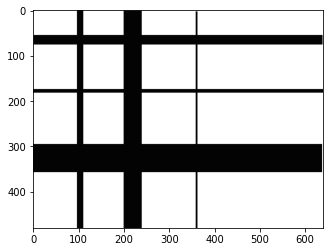

In [5]:
# imshow and imread method
# test image works.
o = plt.imshow(plt.imread('imgs/testy-grid.png'))

# Loading images with mxnet

In [6]:
# read as grayscale
image_HWC1 = mx.image.imread('imgs/testy-grid.png', 0)
image_HWC1f = image_HWC1.astype('float32')
print("image_HWC1")
print(type(image_HWC1))
print(image_HWC1.shape)
print("image_HWC1f")
print(type(image_HWC1f))
print(image_HWC1f.shape)
# plot image as grayscale
#plt.imshow(image_HWC1.asnumpy(), cmap='gray')

image_HWC1
<class 'mxnet.ndarray.ndarray.NDArray'>
(480, 640, 1)
image_HWC1f
<class 'mxnet.ndarray.ndarray.NDArray'>
(480, 640, 1)


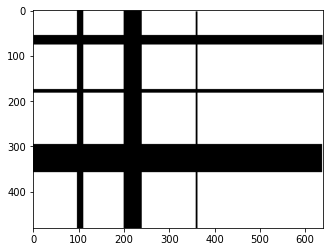

In [7]:
# plot image as grayscale
plt.imshow(image_HWC1.asnumpy(), cmap='gray')

image_HWC3
<class 'mxnet.ndarray.ndarray.NDArray'>
(480, 640, 3)


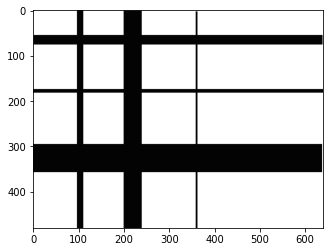

In [8]:
# Load Image as RGB
image_HWC3 = mx.image.image.imread('imgs/testy-grid.png')
print("image_HWC3")
print(type(image_HWC3))
print(image_HWC3.shape)
# plot Image
plt.imshow(image_HWC3.asnumpy())

# Sobel Horizontal Wikipedia
I should have used a url in the conv2D-testy notebook. I can't remember how I did it.
Oh, yeah I know now.  From this [URL](https://en.wikipedia.org/wiki/Edge_detection)

Its in the *Other first-order methods* section.  See below:
![img](imgs/sobel.png)


Sobel horizontal transform Gx
[[ 1.  2.  1.]
 [ 0.  0.  0.]
 [-1. -2. -1.]]
<NDArray 3x3 @cpu(0)>


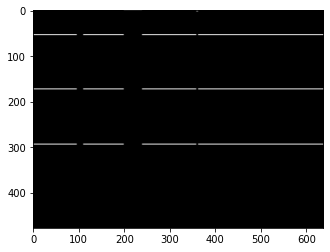

In [9]:
# The wikipedia Sobel horizontal kernel
sobel_horizontal = nd.array((
    ( 1,  2,  1),
    ( 0,  0,  0),
    (-1, -2, -1)
))

print("\nSobel horizontal transform Gx", end='')
print(sobel_horizontal)

# create a weight constant
w = mx.init.Constant(sobel_horizontal)

# create a nn. You need to do this.  Calling the layer.initialize() function below
# will not update the filter without it?
layer = nn.Conv2D(channels=1, kernel_size=(3,3), in_channels=1, strides=(1,1), padding=(0,0), activation='relu', prefix='conv_')

# init layer with this constant
layer.initialize(w)

# read as grayscale
#image_HWC1 = mx.image.imread('imgs/testy-grid.png', 0)
#image_HWC1f = image_HWC1.astype('float32')

# So that its channel first. 
image_CHWf = image_HWC1f.transpose((2,0,1))
# Convert 3D to 4D with leading batch channel.  
image_NCHWf = image_CHWf.expand_dims(axis=0)
# Now its in NCHW format
output = layer(image_NCHWf)
# output is a 4D tensor in NCHW format
# Use squeeze to remove any 1-D dimension
result_numpy_HWC = output.squeeze().asnumpy()
# show result
plt.imshow(result_numpy_HWC, cmap='gray')


Sobel vertical transform Gx
[[ 1.  0. -1.]
 [ 2.  0. -2.]
 [ 1.  0. -1.]]
<NDArray 3x3 @cpu(0)>


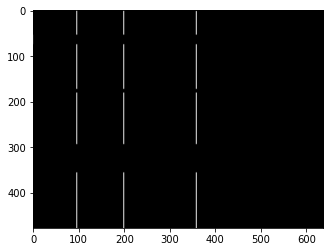

In [10]:
# The wikipedia Sobel vertical kernel
sobel_vertical = nd.array((
    ( 1,  0, -1),
    ( 2,  0, -2),
    ( 1,  0, -1)
))

print("\nSobel vertical transform Gx", end='')
print(sobel_vertical)

# create a weight constant
w = mx.init.Constant(sobel_vertical)

# create a nn. You need to do this.  Calling the layer.initialize() function below
# will not update the filter without it?
layer = nn.Conv2D(channels=1, kernel_size=(3,3), in_channels=1, strides=(1,1), padding=(0,0), activation='relu', prefix='conv_')

# init layer with this constant
layer.initialize(w)


# read as grayscale
#image_HWC1 = mx.image.imread('imgs/testy-grid.png', 0)
#image_HWC1f = image_HWC1.astype('float32')

# So that its channel first. 
image_CHWf = image_HWC1f.transpose((2,0,1))
# Convert 3D to 4D with leading batch channel.  
image_NCHWf = image_CHWf.expand_dims(axis=0)
# Now its in NCHW format
output = layer(image_NCHWf)
# output is a 4D tensor in NCHW format
# Use squeeze to remove any 1-D dimension
result_numpy_HWC = output.squeeze().asnumpy()
# show result
plt.imshow(result_numpy_HWC, cmap='gray')


Sobel sobel_all_edge transform Gx
[[-1. -1. -1.]
 [-1.  8. -1.]
 [-1. -1. -1.]]
<NDArray 3x3 @cpu(0)>


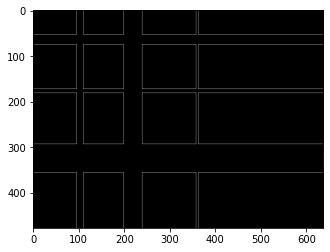

In [16]:
# The wikipedia Sobel all edge kernel
sobel_all_edge = nd.array((
    ( -1,  -1, -1),
    ( -1,  8, -1),
    ( -1,  -1, -1)
))

print("\nSobel sobel_all_edge transform Gx", end='')
print(sobel_all_edge)

# create a weight constant
w = mx.init.Constant(sobel_all_edge)

# create a nn. You need to do this.  Calling the layer.initialize() function below
# will not update the filter without it?
layer = nn.Conv2D(channels=1, kernel_size=(3,3), in_channels=1, strides=(1,1), padding=(0,0), activation='relu', prefix='conv_')

# init layer with this constant
layer.initialize(w)


# read as grayscale
image_HWC1 = mx.image.imread('imgs/testy-grid.png', 0)
#image_HWC1 = mx.image.imread('imgs/stimpyG.png', 0)
image_HWC1f = image_HWC1.astype('float32')

# So that its channel first. 
image_CHWf = image_HWC1f.transpose((2,0,1))
# Convert 3D to 4D with leading batch channel.  
image_NCHWf = image_CHWf.expand_dims(axis=0)
# Now its in NCHW format
output = layer(image_NCHWf)
# output is a 4D tensor in NCHW format
# Use squeeze to remove any 1-D dimension
result_numpy_HWC = output.squeeze().asnumpy()
# show result
plt.imshow(result_numpy_HWC, cmap='gray')

# Snow

image_HWC3
<class 'mxnet.ndarray.ndarray.NDArray'>
(480, 704, 3)


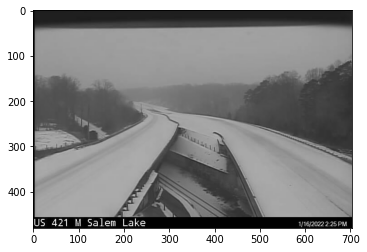

In [6]:
# load an image using numpy and display it.
image_filepath = 'imgs/BUS40_SALEM_20220116Z1430G.jpg'
# Load Image as RGB
image_HWC3 = mx.image.image.imread(image_filepath)
print("image_HWC3")
print(type(image_HWC3))
print(image_HWC3.shape)
# plot Image
plt.imshow(image_HWC3.asnumpy())


Sobel sobel_all_edge transform Gx
[[-1. -1. -1.]
 [-1.  8. -1.]
 [-1. -1. -1.]]
<NDArray 3x3 @cpu(0)>


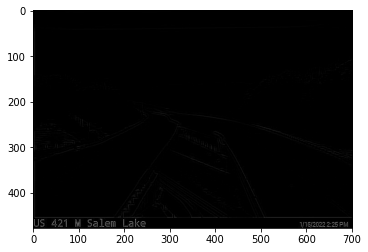

In [8]:
# The wikipedia Sobel all edge kernel
sobel_all_edge = nd.array((
    ( -1,  -1, -1),
    ( -1,  8, -1),
    ( -1,  -1, -1)
))

print("\nSobel sobel_all_edge transform Gx", end='')
print(sobel_all_edge)

# create a weight constant
w = mx.init.Constant(sobel_all_edge)

# create a nn. You need to do this.  Calling the layer.initialize() function below
# will not update the filter without it?
layer = nn.Conv2D(channels=1, kernel_size=(3,3), in_channels=1, strides=(1,1), padding=(0,0), activation='relu', prefix='conv_')

# init layer with this constant
layer.initialize(w)


# read as grayscale
image_HWC1 = mx.image.imread('imgs/BUS40_SALEM_20220116Z1430G.jpg', 0)
#image_HWC1 = mx.image.imread('imgs/stimpyG.png', 0)
image_HWC1f = image_HWC1.astype('float32')

# So that its channel first. 
image_CHWf = image_HWC1f.transpose((2,0,1))
# Convert 3D to 4D with leading batch channel.  
image_NCHWf = image_CHWf.expand_dims(axis=0)
# Now its in NCHW format
output = layer(image_NCHWf)
# output is a 4D tensor in NCHW format
# Use squeeze to remove any 1-D dimension
result_numpy_HWC = output.squeeze().asnumpy()
# show result
plt.imshow(result_numpy_HWC, cmap='gray')

# no snow

image_HWC3
<class 'mxnet.ndarray.ndarray.NDArray'>
(480, 704, 3)


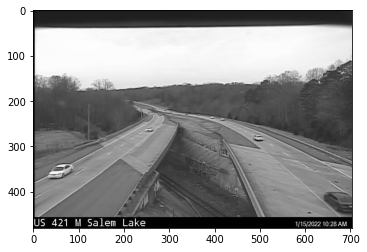

In [10]:
# load an image using numpy and display it.
image_filepath = 'imgs/BUS40_SALEM_20220115Z1030G.jpg'
# Load Image as RGB
image_HWC3 = mx.image.image.imread(image_filepath)
print("image_HWC3")
print(type(image_HWC3))
print(image_HWC3.shape)
# plot Image
plt.imshow(image_HWC3.asnumpy())


Sobel sobel_all_edge transform Gx
[[-1. -1. -1.]
 [-1.  8. -1.]
 [-1. -1. -1.]]
<NDArray 3x3 @cpu(0)>


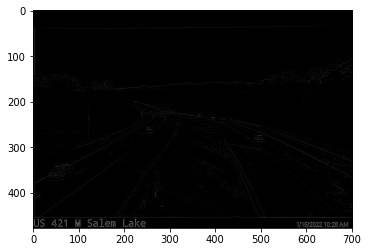

In [11]:
# The wikipedia Sobel all edge kernel
sobel_all_edge = nd.array((
    ( -1,  -1, -1),
    ( -1,  8, -1),
    ( -1,  -1, -1)
))

print("\nSobel sobel_all_edge transform Gx", end='')
print(sobel_all_edge)

# create a weight constant
w = mx.init.Constant(sobel_all_edge)

# create a nn. You need to do this.  Calling the layer.initialize() function below
# will not update the filter without it?
layer = nn.Conv2D(channels=1, kernel_size=(3,3), in_channels=1, strides=(1,1), padding=(0,0), activation='relu', prefix='conv_')

# init layer with this constant
layer.initialize(w)


# read as grayscale
image_HWC1 = mx.image.imread('imgs/BUS40_SALEM_20220115Z1030G.jpg', 0)
#image_HWC1 = mx.image.imread('imgs/stimpyG.png', 0)
image_HWC1f = image_HWC1.astype('float32')

# So that its channel first. 
image_CHWf = image_HWC1f.transpose((2,0,1))
# Convert 3D to 4D with leading batch channel.  
image_NCHWf = image_CHWf.expand_dims(axis=0)
# Now its in NCHW format
output = layer(image_NCHWf)
# output is a 4D tensor in NCHW format
# Use squeeze to remove any 1-D dimension
result_numpy_HWC = output.squeeze().asnumpy()
# show result
plt.imshow(result_numpy_HWC, cmap='gray')